In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
from google.colab import drive
drive.mount('/mnt')

Drive already mounted at /mnt; to attempt to forcibly remount, call drive.mount("/mnt", force_remount=True).


In [3]:
seq_pd = pd.read_csv('/mnt/MyDrive/ml/pdb_data_seq.csv')
df = pd.read_csv('/mnt/MyDrive/ml/pdb_data_no_dups.csv')
df = df.merge(seq_pd, how='inner', on='structureId')

In [4]:
df.head()

,structureId,classification,experimentalTechnique,macromoleculeType_x,residueCount_x,resolution,structureMolecularWeight,crystallizationMethod,crystallizationTempK,densityMatthews,densityPercentSol,pdbxDetails,phValue,publicationYear,chainId,sequence,residueCount_y,macromoleculeType_y
0,100D,DNA-RNA HYBRID,X-RAY DIFFRACTION,DNA/RNA Hybrid,20,1.90,6360.30,"VAPOR DIFFUSION, HANGING DROP",NaN,1.78,30.89,"pH 7.00, VAPOR DIFFUSION, HANGING DROP",7.0,1994.0,A,CCGGCGCCGG,20,DNA/RNA Hybrid
1,100D,DNA-RNA HYBRID,X-RAY DIFFRACTION,DNA/RNA Hybrid,20,1.90,6360.30,"VAPOR DIFFUSION, HANGING DROP",NaN,1.78,30.89,"pH 7.00, VAPOR DIFFUSION, HANGING DROP",7.0,1994.0,B,CCGGCGCCGG,20,DNA/RNA Hybrid
2,101D,DNA,X-RAY DIFFRACTION,DNA,24,2.25,7939.35,NaN,NaN,2.00,38.45,NaN,NaN,1995.0,A,CGCGAATTCGCG,24,DNA
3,101D,DNA,X-RAY DIFFRACTION,DNA,24,2.25,7939.35,NaN,NaN,2.00,38.45,NaN,NaN,1995.0,B,CGCGAATTCGCG,24,DNA
4,101M,OXYGEN TRANSPORT,X-RAY DIFFRACTION,Protein,154,2.07,18112.80,NaN,NaN,3.09,60.20,"3.0 M AMMONIUM SULFATE, 20 MM TRIS, 1MM EDTA, ...",9.0,1999.0,A,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,154,Protein


In [5]:
df = df[df.macromoleculeType_x == 'Protein']
df = df[['classification', 'sequence']]
df = df.dropna()
df.head()

,classification,sequence
4,OXYGEN TRANSPORT,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...
7,HYDROLASE(O-GLYCOSYL),MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAAKSE...
8,OXYGEN TRANSPORT,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...
11,HYDROLASE(O-GLYCOSYL),MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNSLDAAK...
12,OXYGEN TRANSPORT,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...


In [6]:
classes = df['classification'].unique()

In [7]:
classes.shape

(4468,)

4468 classes are too many. We'll keep the top 10

In [8]:
top_classes = pd.value_counts(df['classification'].values, sort=True).head(10).to_dict()
classes = list(top_classes.keys())
classes

['HYDROLASE',
 'TRANSFERASE',
 'OXIDOREDUCTASE',
 'IMMUNE SYSTEM',
 'LYASE',
 'HYDROLASE/HYDROLASE INHIBITOR',
 'TRANSCRIPTION',
 'VIRAL PROTEIN',
 'TRANSPORT PROTEIN',
 'VIRUS']

In [9]:
df = df[df['classification'].isin(classes)]

In [10]:
tokenizer = CountVectorizer(analyzer='char')
X = tokenizer.fit_transform(df.sequence.values)
Y = df.classification

In [11]:
X.shape

(188353, 25)

In [12]:
Y.shape

(188353,)

In [13]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [14]:
def plot_confusion_matrix(cm):
    plt.figure(figsize=(10, 10))
    plt.imshow(cm, cmap=plt.cm.Blues)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    target_names = classes
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)
    plt.tight_layout()
    plt.title('Confusion matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    plt.show()

def evaluate(predictions, target):
    cm = confusion_matrix(target, predictions)
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    print('accuracy %s' % accuracy_score(target, predictions))
    cm = confusion_matrix(target, predictions)    
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plot_confusion_matrix(cm_normalized)

LogisticRegression

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


accuracy 0.40192721191367364


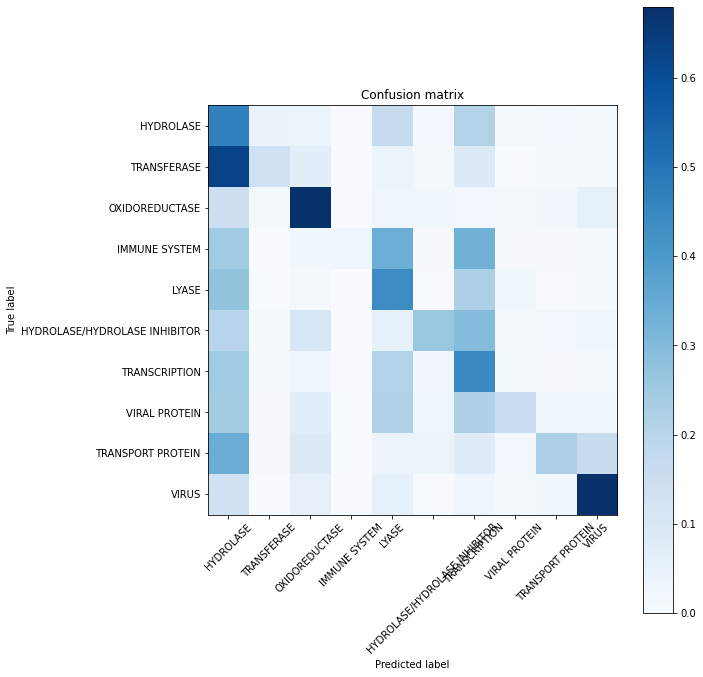

In [15]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
test_pred = logreg.predict(x_test)

evaluate(test_pred, y_test)

MultinomialNB

accuracy 0.28217992620318016


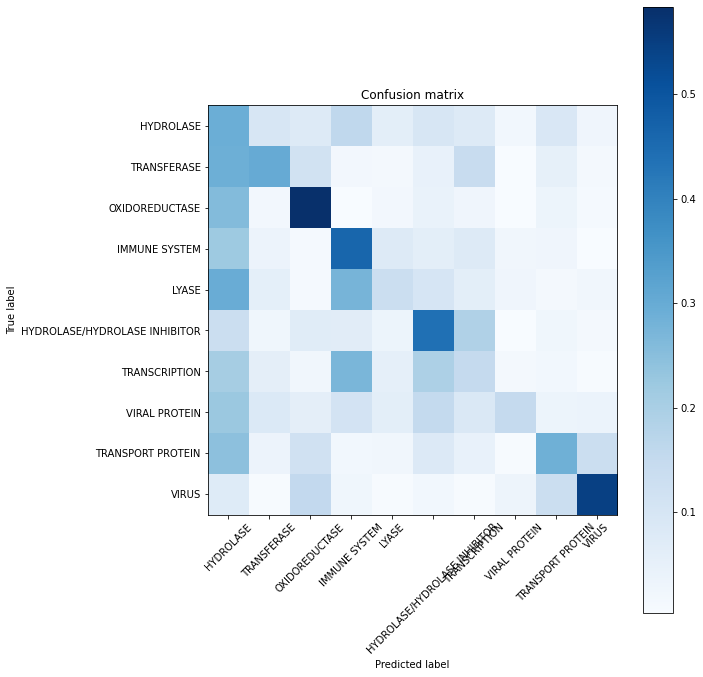

In [16]:
model = MultinomialNB()
model.fit(x_train, y_train)
test_pred = model.predict(x_test)

evaluate(test_pred, y_test)

KNeighborsClassifier

accuracy 0.9070372435029599


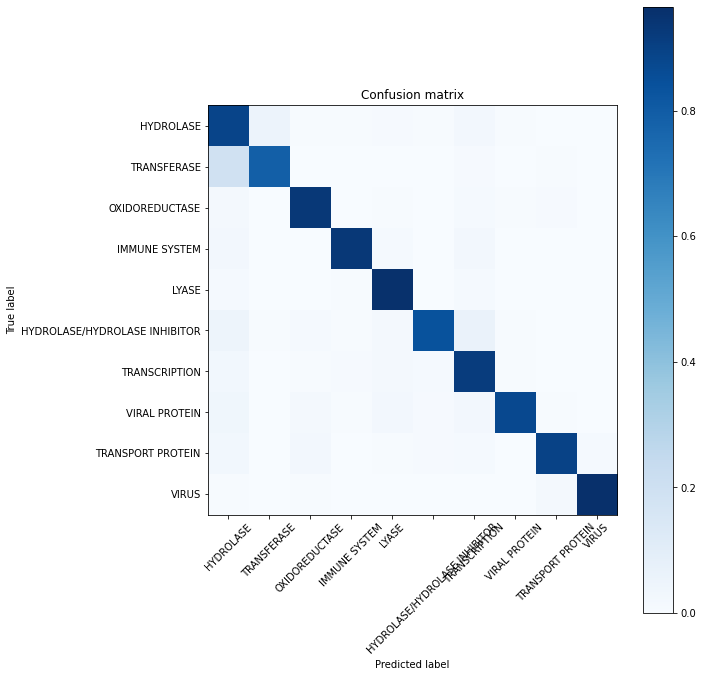

In [17]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
test_pred = knn.predict(x_test)

evaluate(test_pred, y_test)